In [225]:
import pandas as pd
# import scipy as sc
import scipy.stats as stats
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.stats import weightstats as stests
import random
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

import statsmodels.stats.multicomp as mc
import scikit_posthocs
from scipy.stats import friedmanchisquare
import warnings
warnings.filterwarnings("ignore")

In [226]:
absent = pd.read_csv('Absenteeism_at_work.csv')
absent.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load,...,Disciplinary_failure,Education,No_of_Children,Social_drinker,Social_smoker,No_of_Pets,Weight,Height,Body_mass_index,Absenteeism_time_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [227]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               739 non-null    int64  
 1   Reason_for_absence               739 non-null    int64  
 2   Month_of_absence                 739 non-null    int64  
 3   Day_of_the_week                  739 non-null    int64  
 4   Seasons                          739 non-null    int64  
 5   Transportation_expense           739 non-null    int64  
 6   Distance_from_Residence_to_Work  739 non-null    int64  
 7   Service_time                     739 non-null    int64  
 8   Age                              739 non-null    int64  
 9   Work_load                        739 non-null    float64
 10  Hit_target                       739 non-null    int64  
 11  Disciplinary_failure             739 non-null    int64  
 12  Education             

In [228]:
absent['Reason_for_absence'] = absent['Reason_for_absence'].astype(object)
absent['Month_of_absence'] = absent['Month_of_absence'].astype(object)
absent['Day_of_the_week'] = absent['Day_of_the_week'].astype(object)
absent['Seasons'] = absent['Seasons'].astype(object)
absent['Disciplinary_failure'] = absent['Disciplinary_failure'].astype(object)
absent['Education'] = absent['Education'].astype(object)
absent['No_of_Children'] = absent['No_of_Children'].astype(object)
absent['Social_drinker'] = absent['Social_drinker'].astype(object)
absent['Social_smoker'] = absent['Social_smoker'].astype(object)
absent['No_of_Pets'] = absent['No_of_Pets'].astype(object)

In [229]:
absent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               739 non-null    int64  
 1   Reason_for_absence               739 non-null    object 
 2   Month_of_absence                 739 non-null    object 
 3   Day_of_the_week                  739 non-null    object 
 4   Seasons                          739 non-null    object 
 5   Transportation_expense           739 non-null    int64  
 6   Distance_from_Residence_to_Work  739 non-null    int64  
 7   Service_time                     739 non-null    int64  
 8   Age                              739 non-null    int64  
 9   Work_load                        739 non-null    float64
 10  Hit_target                       739 non-null    int64  
 11  Disciplinary_failure             739 non-null    object 
 12  Education             

# Visualization of Data Set

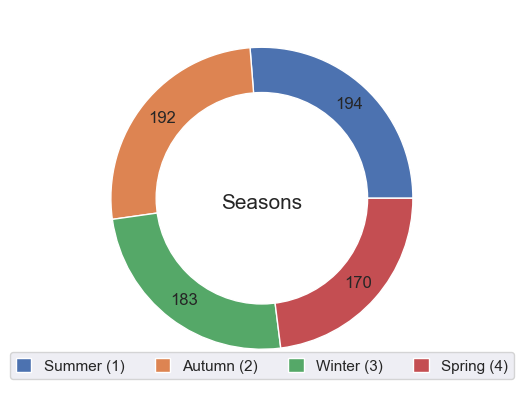

In [29]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.Seasons.value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius=1, pctdistance = 0.85)
plt.title('Seasons', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = ['Summer (1)', 'Autumn (2)', 'Winter (3)', 'Spring (4)'], loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

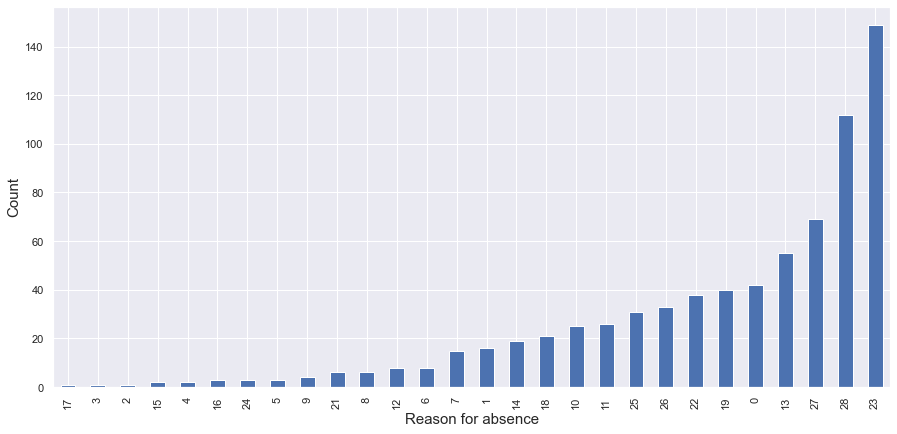

1 Certain infectious and parasitic diseases
2 Neoplasms
3 Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
4 Endocrine, nutritional and metabolic diseases
5 Mental and behavioural disorders
6 Diseases of the nervous system
7 Diseases of the eye and adnexa
8 Diseases of the ear and mastoid process
9 Diseases of the circulatory system
10 Diseases of the respiratory system
11 Diseases of the digestive system
12 Diseases of the skin and subcutaneous tissue
13 Diseases of the musculoskeletal system and connective tissue
14 Diseases of the genitourinary system
15 Pregnancy, childbirth and the puerperium
16 Certain conditions originating in the perinatal period
17 Congenital malformations, deformations and chromosomal abnormalities
18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
19 Injury, poisoning and certain other consequences of external causes
20 External causes of morbidity and mortality
21 Fac

In [30]:
plt.figure(figsize = (15, 7))
absent['Reason_for_absence'].value_counts().sort_values().plot(kind = 'bar')
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Reason for absence', fontsize = 15)
plt.show()

print("""1 Certain infectious and parasitic diseases
2 Neoplasms
3 Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
4 Endocrine, nutritional and metabolic diseases
5 Mental and behavioural disorders
6 Diseases of the nervous system
7 Diseases of the eye and adnexa
8 Diseases of the ear and mastoid process
9 Diseases of the circulatory system
10 Diseases of the respiratory system
11 Diseases of the digestive system
12 Diseases of the skin and subcutaneous tissue
13 Diseases of the musculoskeletal system and connective tissue
14 Diseases of the genitourinary system
15 Pregnancy, childbirth and the puerperium
16 Certain conditions originating in the perinatal period
17 Congenital malformations, deformations and chromosomal abnormalities
18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
19 Injury, poisoning and certain other consequences of external causes
20 External causes of morbidity and mortality
21 Factors influencing health status and contact with health services
22 Patient follow-up
23 Medical consultation
24 Blood donation
25 Laboratory examination
26 Unjustified absence
27 Physiotherapy
28 Dental consultation""")

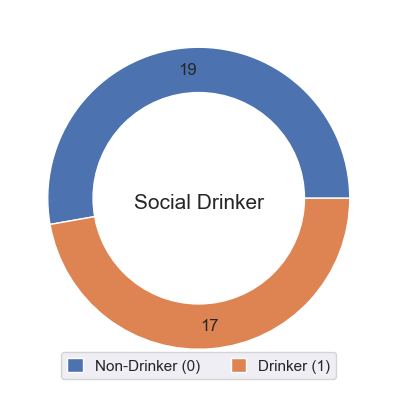

In [31]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').Social_drinker.unique().apply(lambda x: sum(x)).value_counts()
# v_counts = absent.Social_drinker.value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius=1, pctdistance = 0.85)
plt.title('Social Drinker', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = ['Non-Drinker (0)','Drinker (1)'], loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

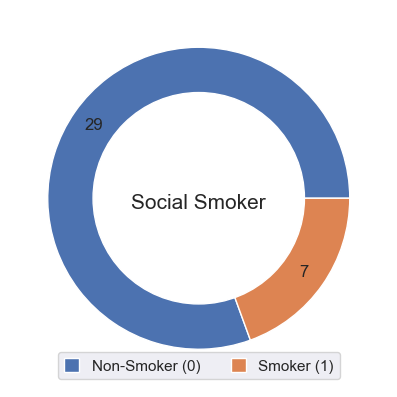

In [32]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').Social_smoker.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('Social Smoker', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = ['Non-Smoker (0)','Smoker (1)'], loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

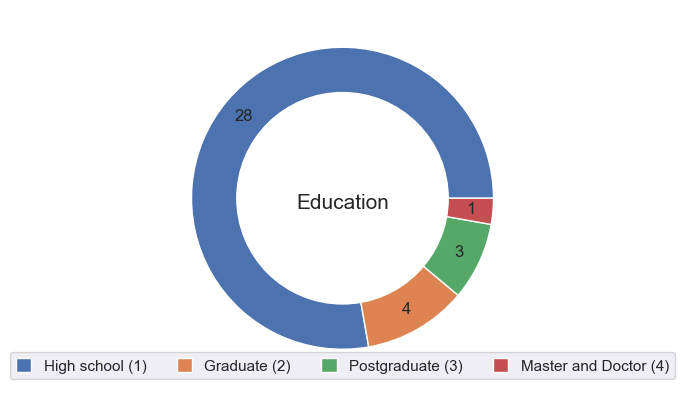

In [33]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').Education.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('Education', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = ['High school (1)', 'Graduate (2)', 'Postgraduate (3)', 'Master and Doctor (4)'], loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

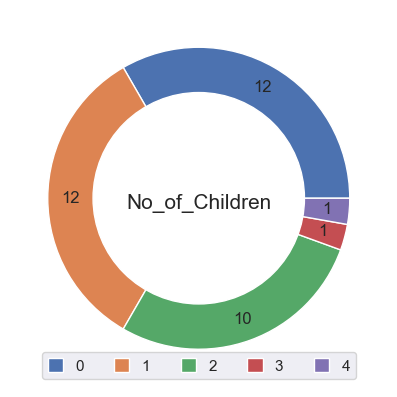

In [34]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').No_of_Children.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('No_of_Children', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

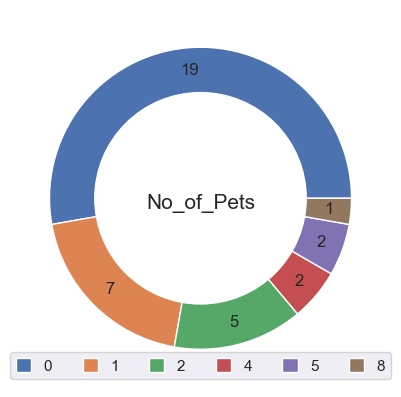

In [35]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.groupby('ID').No_of_Pets.unique().apply(lambda x: sum(x)).value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius = 1, pctdistance = 0.85)
plt.title('No_of_Pets', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = sorted(v_counts.index), loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

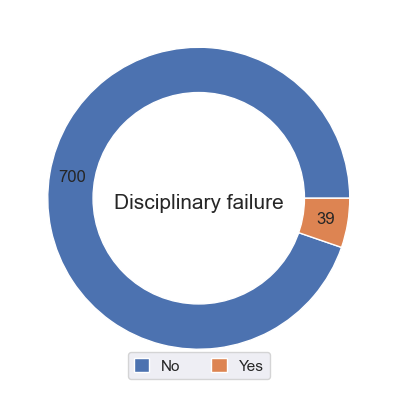

In [36]:
plt.figure(figsize=(9,5), dpi=100)
v_counts = absent.Disciplinary_failure.value_counts()
plt.pie(x = v_counts, autopct = lambda x: '{:.0f}'.format(x * v_counts.sum()/100), radius=1, pctdistance = 0.85)
plt.title('Disciplinary failure', loc = 'Center', y = 0.45, fontsize = 15)
plt.legend(labels = ['No','Yes'], loc = 'lower center', 
           ncol = len(v_counts.index), handlelength=1, handleheight=1)
circle = plt.Circle(xy = (0,0), radius = 0.7, color = 'white')
ax = plt.gca()
ax.add_artist(circle)
plt.show()

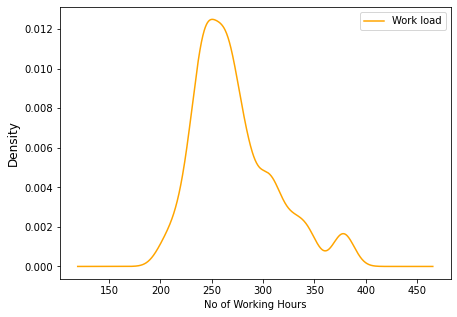

In [20]:
plt.figure(figsize = (7, 5))
absent['Work_load'].plot(kind = 'density', color = 'orange')
plt.legend(['Work load'])
plt.xlabel('No of Working Hours')
plt.ylabel('Density', fontsize = 12)
plt.show()

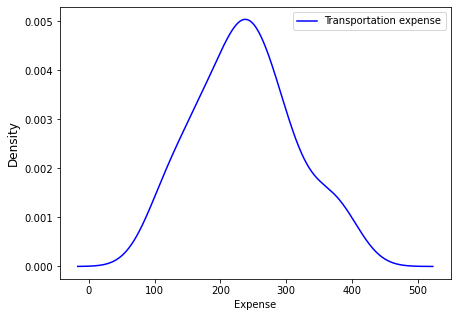

In [21]:
plt.figure(figsize = (7, 5))
absent.groupby('ID').Transportation_expense.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'blue')
plt.legend(['Transportation expense'])
plt.xlabel('Expense')
plt.ylabel('Density', fontsize = 12)
plt.show()

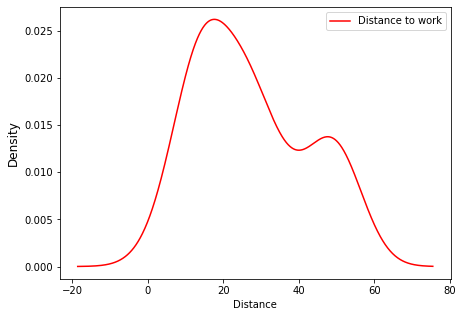

In [23]:
plt.figure(figsize = (7, 5))
absent.groupby('ID').Distance_from_Residence_to_Work.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'red')
plt.legend(['Distance to work'])
plt.xlabel('Distance')
plt.ylabel('Density', fontsize = 12)
plt.show()

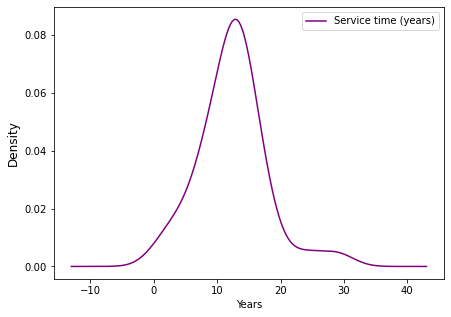

In [24]:
plt.figure(figsize = (7, 5))
absent.groupby('ID').Service_time.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'purple')
plt.legend(['Service time (years)'])
plt.xlabel('Years')
plt.ylabel('Density', fontsize = 12)
plt.show()

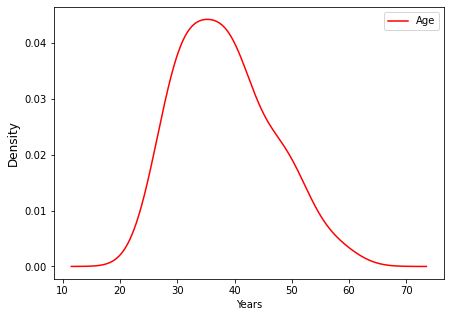

In [25]:
plt.figure(figsize = (7, 5))
absent.groupby('ID').Age.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'red')
plt.legend(['Age'])
plt.xlabel('Years')
plt.ylabel('Density', fontsize = 12)
plt.show()

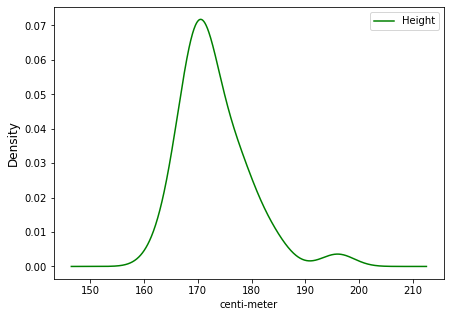

In [28]:
plt.figure(figsize = (7, 5))
absent.groupby('ID').Height.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'green')
plt.legend(['Height'])
plt.xlabel('centi-meter')
plt.ylabel('Density', fontsize = 12)
plt.show()

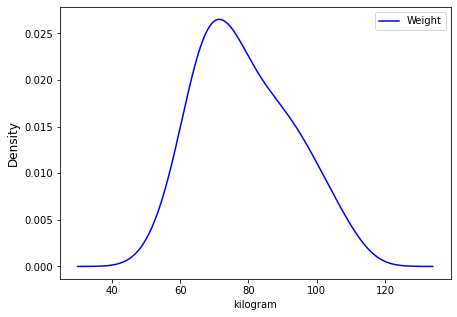

In [29]:
plt.figure(figsize = (7, 5))
absent.groupby('ID').Weight.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'blue')
plt.legend(['Weight'])
plt.xlabel('kilogram')
plt.ylabel('Density', fontsize = 12)
plt.show()

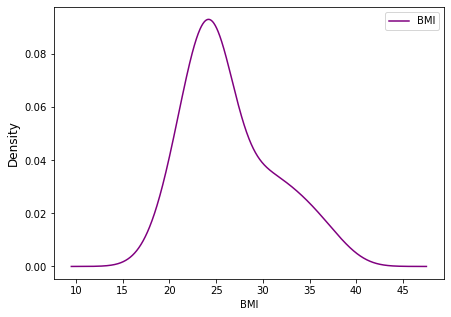

In [30]:
plt.figure(figsize = (7, 5))
absent.groupby('ID').Body_mass_index.unique().apply(lambda x: sum(x)).plot(kind = 'density', color = 'purple')
plt.legend(['BMI'])
plt.xlabel('BMI')
plt.ylabel('Density', fontsize = 12)
plt.show()

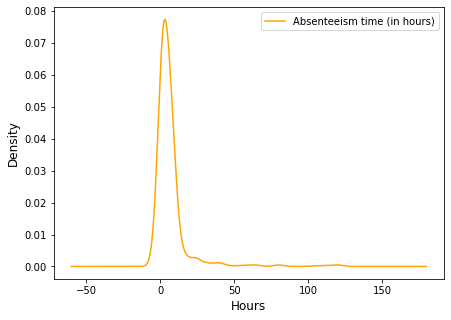

In [32]:
plt.figure(figsize = (7, 5))
absent['Absenteeism_time_hours'].plot(kind = 'density', color = 'orange')
plt.legend(['Absenteeism time (in hours)'])
plt.ylabel('Density', fontsize = 12)
plt.xlabel('Hours', fontsize = 12)
plt.show()

## Z-test

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:140%">
                <font color="#21618C">
                    <b>The HR department of the company claims that the average transport expense of all employees in the company is less than 200.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# H0 : mu >= 200
# Ha : mu < 200

transport_expense = absent.groupby('ID').Transportation_expense.unique().apply(lambda x: sum(x))
stats, p_val = shapiro(transport_expense)
print('Test statistic =', stats, '\np-value =', p_val)
transport_expense

Test statistic = 0.9588057398796082 
p-value = 0.19743359088897705


ID
1     235
2     235
3     179
4     118
5     235
6     189
7     279
8     231
9     228
10    361
11    289
12    233
13    369
14    155
15    291
16    118
17    179
18    330
19    291
20    260
21    268
22    179
23    378
24    246
25    235
26    300
27    184
28    225
29    225
30    157
31    388
32    289
33    248
34    118
35    179
36    118
Name: Transportation_expense, dtype: int64

* p_val is greater than alpha (0.05) at 95% confidence level. So we can say the data is normally distributed

In [15]:
xbar = np.mean(transport_expense)
sample_std = np.std(transport_expense)
print('Sample mean =', round(xbar, 5))
print('Sample stdev =', round(sample_std, 5))


# Given information 
mu = 200
alpha = 0.05
n = len(absent['ID'].unique())
print("Sample size = ", n)

# Calculate Z-score
z_score = (xbar - mu)/(sample_std / np.sqrt(n))
print('\nZ-score =', round(z_score, 5))

# p-value for Z statistic
p_val = sc.stats.norm.cdf(z_score)
print('p-value =', round(p_val, 5))

# Calculate Z-critical for left-tailed test at 99% confidence level
z_crit = round(sc.stats.norm.isf(alpha), 4)
print('\nCritical value for left-tailed Z-test =', -z_crit)

print('\nConfidence interval:', sc.stats.norm.interval(0.95, loc = np.mean(transport_expense), 
                                                  scale = sample_std / np.sqrt(n)))


Sample mean = 237.27778
Sample stdev = 72.94732
Sample size =  36

Z-score = 3.06614
p-value = 0.99892

Critical value for left-tailed Z-test = -1.6449

Confidence interval: (213.44875726082412, 261.1067982947314)


### * p_val is greater than alpha (0.05) at 95% confidence level
### * Z-score is greater than Z-critical, Z-score falls in acceptance region of H0
### * Confidence interval does not contain the hypothesized mean 
### * Therefore we fail to reject the null hypothesis and conclude that the average transport expense of employees is greater than 200

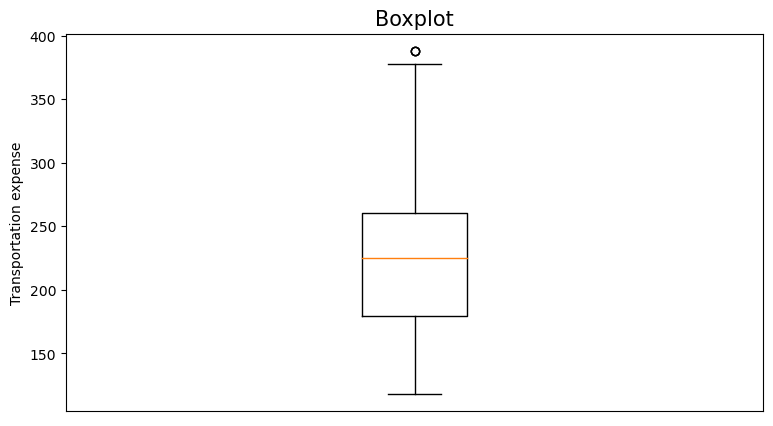

In [19]:
plt.figure(figsize=(9,5), dpi=100)
plt.boxplot(x = absent['Transportation_expense'])
plt.title('Boxplot', fontsize = 15)
plt.ylabel('Transportation expense')
plt.xticks([])
plt.show()

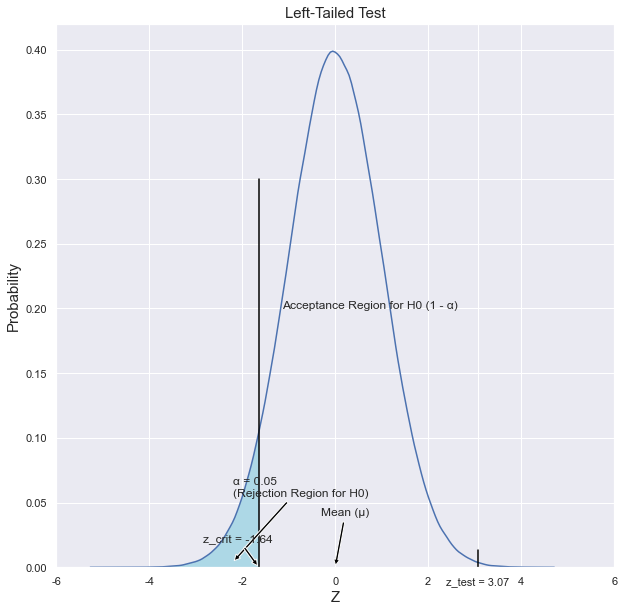

In [37]:
# consider a random variable 'X' that follows a standard normal distribution 
plt.figure(figsize = (10,10))
X = stats.norm.rvs(size = 1000000, random_state = 20)

# plot the distribution of X
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# Calculate the critical z-value for alpha = 0.1
z = stats.norm.isf(q = 0.95)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-score value
x, y = [z_score, z_score], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value and left of -(z-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= z], y1[x1 <= z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
plt.annotate(text = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'α = 0.05\n(Rejection Region for H0)', xy = (-2.2, 0.004), xytext = (-2.2, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(text = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Left-Tailed Test', fontsize = 15)

# display the plot
plt.show()

## Mann-Whitney U Test - 2 Samples of category Smoker and Non-Smoker considered for the Variable Absenteeism

### The HR department wants to check if the absenteeism of smokers and non-smokers are different. 

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:140%">
                <font color="#21618C">
                    <b>Ho : F_smokers = F_non-smokers (Sum of absenteeism hours among smokers and non-smokers are the same) </b><br></br>
                    <b>Ha : F_smokers != F_non-smokers (Sum of absenteeism hours among smokers and non-smokers are different)</b>
                </font>
            </div>
        </td>
    </tr>
</table>


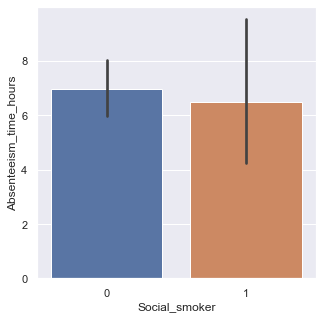

Total of absenteeism hours among smokers:
ID
2      25
7      30
16     16
17    126
23     40
26     83
30     31
Name: Absenteeism_time_hours, dtype: int64

Number of smokers: 7
ShapiroResult(statistic=0.8058587312698364, pvalue=0.04678918793797493)
Since p-value is less than Alpha, we reject the Null hypothesis
and hence we conclude that absenteeism hours among smokers is not normally distributed


In [22]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x ='Social_smoker', y ='Absenteeism_time_hours', data = absent)
plt.show()
# Sum of absenteeism hours among smokers
absent_sum_smoker = absent[absent['Social_smoker'] == 1].groupby(by='ID')['Absenteeism_time_hours'].sum()
print("Total of absenteeism hours among smokers:") 
print(absent_sum_smoker)
print("\nNumber of smokers:", len(absent_sum_smoker))

# perform Shapiro-Wilk test to test the normality
print(sc.stats.shapiro(absent_sum_smoker))
print("""Since p-value is less than Alpha, we reject the Null hypothesis
and hence we conclude that absenteeism hours among smokers is not normally distributed""")


Text(0.5, 1.0, 'Sum of Absenteeism for Smokers')

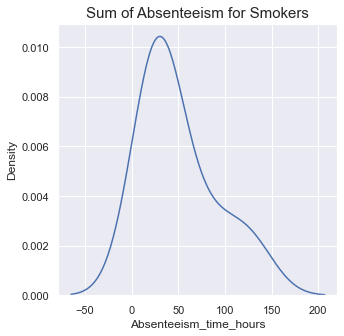

In [231]:
# plot the distribution of X
ax = sns.distplot(a = absent_sum_smoker, hist = False, kde_kws = dict(cumulative=False))
plt.title('Sum of Absenteeism for Smokers', fontsize = 15)

In [69]:
# Sum of absenteeism hours among non-smokers
absent_sum_nonsmoker = absent[absent['Social_smoker'] == 0].groupby('ID')['Absenteeism_time_hours'].sum()
print("Total of absenteeism hours among non-smokers:")
print(absent_sum_nonsmoker)
print("\nNumber of non-smokers:", len(absent_sum_nonsmoker))

# perform Shapiro-Wilk test to test the normality
print(stats.shapiro(absent_sum_nonsmoker))
print("""Since p-value is less than Alpha, we reject the Null hypothesis
and hence we conclude that absenteeism hours among non smokers is not normally distributed""")

Total of absenteeism hours among non-smokers:
ID
1     121
3     482
4       0
5     104
6      72
8       0
9     262
10    186
11    450
12     34
13    183
14    476
15    253
18    118
19      6
20    306
21     16
22    253
24    254
25     42
27     27
28    347
29     21
31     16
32     16
33     73
34    344
35      0
36    311
Name: Absenteeism_time_hours, dtype: int64

Number of non-smokers: 29
ShapiroResult(statistic=0.8775725960731506, pvalue=0.00296563608571887)
Since p-value is less than Alpha, we reject the Null hypothesis
and hence we conclude that absenteeism hours among non smokers is not normally distributed


Text(0.5, 1.0, 'Sum of Absenteeism for Non-Smokers')

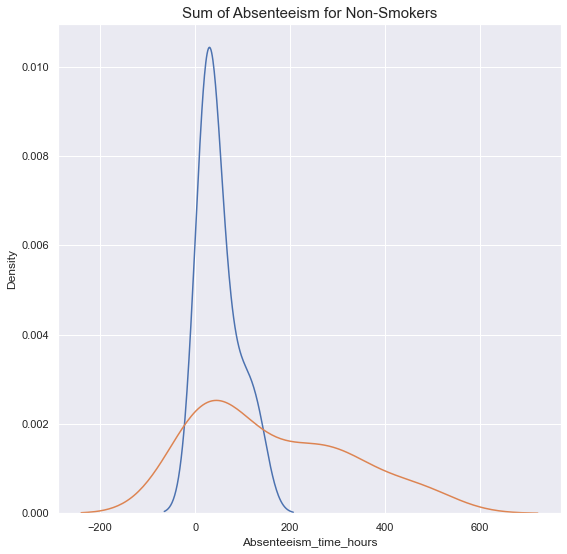

In [232]:
# plot the distribution of X
plt.figure(figsize = (9,9))
ax = sns.distplot(a = absent_sum_smoker, hist = False, kde_kws = dict(cumulative=False))
ax = sns.distplot(a = absent_sum_nonsmoker, hist = False, kde_kws = dict(cumulative=False))
plt.title('Sum of Absenteeism for Non-Smokers', fontsize = 15)

In [70]:
# compute test statistic and corresponding p-value for two-tailed test
stats.mannwhitneyu(absent_sum_smoker, absent_sum_nonsmoker, alternative = 'two-sided')

MannwhitneyuResult(statistic=70.5, pvalue=0.22235694262452077)

#### The pvalue is greater than 0.05 and therefore we fail to reject the Null hypothesis that the distribution of absenteeism for the samples of smoker and non-smoker are the same. 

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:140%">
                <font color="green">
                    <b> Therefore there is not enough evidence to show that there is an impact on absenteeism due to smoking habits..</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Kruskal-Wallis Test  - Samples of 3 groups of age as category is considered for Variable Absenteeism

### 3 samples taken based on age of employees, tested for the average of their absenteeism hours


<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Ho : The averages of absenteeism in all samples based on age of the employee are equal</b>
                    <br>
<b>Ha : At least one sample based on age of the employee has a different average of absenteeism</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [234]:
absent_age_less_than_30 = absent[absent.Age <= 30]['Absenteeism_time_hours']
absent_age_bw_30_and_37 = absent[(absent.Age > 30) & (absent.Age <= 37 )]['Absenteeism_time_hours']
absent_age_more_than_37 = absent[absent.Age > 37]['Absenteeism_time_hours']

print(len(absent_age_less_than_30),len(absent_age_bw_30_and_37),len(absent_age_more_than_37 ))
print(stats.shapiro(absent['Absenteeism_time_hours']))
print(stats.levene(absent_age_less_than_30,absent_age_bw_30_and_37,absent_age_more_than_37))
print("From Shapiro test, we get to know that data is not normally distributed.")
print("Levene test shows that the variance of absenteeism is similar between age groups.")
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 2), 4))
print('chi2_val : ',chi2_val)
Test_Stats, P_Value = stats.kruskal(absent_age_less_than_30,
                      absent_age_bw_30_and_37,absent_age_more_than_37)
print("Significance level :",0.05)
print("P-value from Kruskal: ",round(P_Value,8))
print("Critical Chi2:",chi2_val,"Test Chi2:",round(Test_Stats,4))

176 243 320
ShapiroResult(statistic=0.40077584981918335, pvalue=7.286752014489049e-44)
LeveneResult(statistic=1.864815753730452, pvalue=0.15565601476458193)
From Shapiro test, we get to know that data is not normally distributed.
Levene test shows that the variance of absenteeism is similar between age groups.
chi2_val :  5.9915
Significance level : 0.05
P-value from Kruskal:  3.2e-07
Critical Chi2: 5.9915 Test Chi2: 29.9392


### Chi-square test statistics is greater than Chi-square critical value and therefore the null hypothesis can be rejected. 
### Also p-value is less than 0.05 and supports the same arguement of rejecting the null hypothesis for a 95% confidence level.
<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Therefore it can be concluded that at least one sample has a different absenteeism.</b>
                    <br>
                    <b></b>
                </font>
            </div>
        </td>
    </tr>
</table>


#### If Kruskal-Wallis H test rejects the null hypothesis; we conclude that at least one treatment has a different mean. 
#### The test does not distinguish a treatment with the different average value.
#### The post-hoc test is used to identify such treatment(s). Thus we use the conover test as a post-hoc test.

## Posthoc-Conover Test - Posthoc for Kruskal-Wallis

In [77]:
absent_age_less_than_30 = absent[absent.Age <= 30]['Absenteeism_time_hours']
absent_age_bw_30_and_37 = absent[(absent.Age > 30) & (absent.Age <= 37)]['Absenteeism_time_hours']
absent_age_more_than_37 = absent[absent.Age >37]['Absenteeism_time_hours']


abs_age1=pd.DataFrame({'Age':'Age_less_than_30','Absenteeism time':absent_age_less_than_30})
abs_age2=pd.DataFrame({'Age':'Age_bw_30_and_37','Absenteeism time':absent_age_bw_30_and_37})
abs_age4=pd.DataFrame({'Age':'Age_more_than_37','Absenteeism time':absent_age_more_than_37})

Age_absentee=pd.DataFrame()
Age_absentee=Age_absentee.append(abs_age1)
Age_absentee=Age_absentee.append(abs_age2)
Age_absentee=Age_absentee.append(abs_age4)


Age_absentee

,Age,Absenteeism time
6,Age_less_than_30,8
20,Age_less_than_30,8
22,Age_less_than_30,40
25,Age_less_than_30,7
27,Age_less_than_30,4
...,...,...
726,Age_more_than_37,8
728,Age_more_than_37,120
736,Age_more_than_37,0
737,Age_more_than_37,0


In [78]:
scikit_posthocs.posthoc_conover(a = Age_absentee, val_col = 
                    'Absenteeism time', group_col = 'Age')

,Age_bw_30_and_37,Age_less_than_30,Age_more_than_37
Age_bw_30_and_37,1.000000e+00,0.000015,3.108801e-07
Age_less_than_30,1.460013e-05,1.000000,9.364194e-01
Age_more_than_37,3.108801e-07,0.936419,1.000000e+00


<Figure size 1440x1440 with 0 Axes>

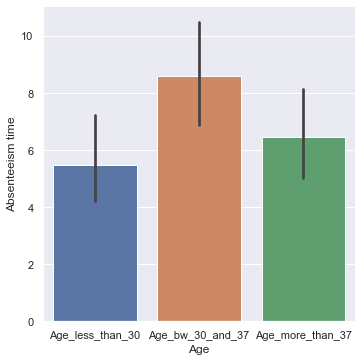

In [233]:
plt.figure(figsize = (20,20))
sns.catplot(x ='Age', y ='Absenteeism time', data = Age_absentee, kind ='bar')
plt.show()

### From the posthoc_conover test results we can see that Absenteeism between age group of (<30) & (30-37),(30-37) &  (<37) has a different mean because it is giving a p-value less than 0.05.

## Friedman Test - Non-parametric test of more than 2 samples based on a category for the same population before and after treatment
<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Ho: The distribution of absenteeism is same for all the four quarters of the year.</b>
                    <br>
                    <b>Ha: The distribution of absenteeism is not same for all the four quarters of the year.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [88]:
absentee_quarter1=absent[absent['Month_of_absence'] <= 3]['Absenteeism_time_hours'].sample(n=30,random_state=1)
absentee_quarter2=absent[(absent['Month_of_absence'] > 3) & (absent['Month_of_absence'] <=6)]['Absenteeism_time_hours'].sample(n=30,random_state=1)
absentee_quarter3=absent[(absent['Month_of_absence'] > 6) & (absent['Month_of_absence'] <=9)]['Absenteeism_time_hours'].sample(n=30,random_state=1)
absentee_quarter4=absent[(absent['Month_of_absence'] > 9) & (absent['Month_of_absence'] <=12)]['Absenteeism_time_hours'].sample(n=30,random_state=1)

# sample_df = df.groupby("target").sample(n=5000, random_state=1)
absent['Month_of_absence'].value_counts()
print(stats.shapiro(absent['Absenteeism_time_hours']))
print("From Shapiro test, we get to know that data is not normally distributed.")
print(stats.levene(absentee_quarter1,absentee_quarter2,absentee_quarter3,absentee_quarter4))
print("Levene test shows that the variance of absenteeism is similar in each quarter for the employees")

ShapiroResult(statistic=0.40077584981918335, pvalue=7.286752014489049e-44)
From Shapiro test, we get to know that data is not normally distributed.
LeveneResult(statistic=0.40407184938325813, pvalue=0.7503432544397711)
Levene test shows that the variance of absenteeism is similar in each quarter for the employees


In [91]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 3), 4))
print(chi2_val)
print(friedmanchisquare(absentee_quarter1,absentee_quarter2, absentee_quarter3,absentee_quarter4))

7.8147
FriedmanchisquareResult(statistic=0.7444444444444621, pvalue=0.8627036550551062)


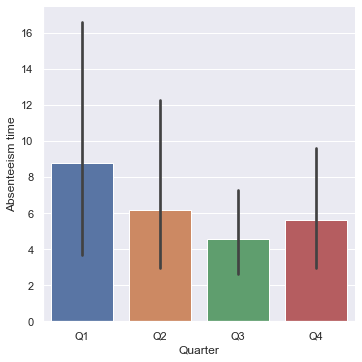

In [236]:
absentee_quarter1=absent[absent['Month_of_absence'] <= 3]['Absenteeism_time_hours'].sample(n=30,random_state=1)
absentee_quarter2=absent[(absent['Month_of_absence'] > 3) & (absent['Month_of_absence'] <=6)]['Absenteeism_time_hours'].sample(n=30,random_state=1)
absentee_quarter3=absent[(absent['Month_of_absence'] > 6) & (absent['Month_of_absence'] <=9)]['Absenteeism_time_hours'].sample(n=30,random_state=1)
absentee_quarter4=absent[(absent['Month_of_absence'] > 9) & (absent['Month_of_absence'] <=12)]['Absenteeism_time_hours'].sample(n=30,random_state=1)

Quarter1=pd.DataFrame({'Quarter':'Q1','Absenteeism time':absentee_quarter1})
Quarter2=pd.DataFrame({'Quarter':'Q2','Absenteeism time':absentee_quarter2})
Quarter3=pd.DataFrame({'Quarter':'Q3','Absenteeism time':absentee_quarter3})
Quarter4=pd.DataFrame({'Quarter':'Q4','Absenteeism time':absentee_quarter4})

Quarter_absentee=pd.DataFrame()
Quarter_absentee=Quarter_absentee.append(Quarter1)
Quarter_absentee=Quarter_absentee.append(Quarter2)
Quarter_absentee=Quarter_absentee.append(Quarter3)
Quarter_absentee=Quarter_absentee.append(Quarter4)
Quarter_absentee

sns.catplot(x ='Quarter', y ='Absenteeism time', data =Quarter_absentee , kind ='bar')

### The critical value of Chi-square is greater than test Chi-square and pvalue is greater than alpha, therefore we fail to reject the null hypothesis.

### i.e There is not enough evidence to prove that the absenteeism is different for the same person across various quarters.

## One-way ANOVA - Weight vs. number_children

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:140%">
                <font color="#21618C">
                    <b>A consulting company wants to study the equality of average weight of employees with different number of children.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
# H0: The average weights of employees with different number of children is the same
# H1: The average weights of employees with different number of children is different

# Sum of absenteeism hours among non-smokers
emp_wt = absent.groupby('ID').Weight.unique().apply(lambda x: sum(x))

# perform Shapiro-Wilk test to test the normality
stat, p_value = shapiro(emp_wt)

# print the corresponding p-value 
print('\np-value:', p_value)


p-value: 0.22908827662467957


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the weight of employees is normally distributed.

In [94]:
wt_zero = absent[absent['No_of_Children'] == 0].groupby('ID').Weight.unique().apply(lambda x: sum(x))
wt_one = absent[absent['No_of_Children'] == 1].groupby('ID').Weight.unique().apply(lambda x: sum(x))
wt_two = absent[absent['No_of_Children'] == 2].groupby('ID').Weight.unique().apply(lambda x: sum(x))
wt_three = absent[absent['No_of_Children'] == 3].groupby('ID').Weight.unique().apply(lambda x: sum(x))
wt_four = absent[absent['No_of_Children'] == 4].groupby('ID').Weight.unique().apply(lambda x: sum(x))

In [95]:
# perform Levene's test for the equality of variances 
stat, p_value = stats.levene(wt_zero, wt_one, wt_two, wt_three, wt_four)

# print the p-value 
print('p-value:', p_value)

p-value: 0.4335248705454786


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the population variances are equal for the different groups.

* Assumption of normality is satisfied by Shapiro-Wilk test
* Assumption of equality of variance is satisfied by Levene's test

In [96]:
# obtain count of unique categories under number of children
t = absent['No_of_Children'].nunique()
print('t:', t)

# count of total number of employees
N = absent['ID'].nunique()
print('N:', N)

t: 5
N: 36


In [97]:
# calculate the F-value for 95% of confidence level
# use 'stats.f.isf()' to find the F-value corresponding to the upper tail probability 'q'

f = np.abs(round(stats.f.isf(q = 0.05, dfn = t-1, dfd = N-t), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 2.6787


In [98]:
# perform one-way ANOVA
# pass the given data
f_test, p_val = stats.f_oneway(wt_zero, wt_one, wt_two, wt_three, wt_four)

# print the test statistic and corresponding p-value
print('Test statistic:', f_test)
print('p-value:', p_val)

Test statistic: 0.8962251490577251
p-value: 0.47802251612924485


* p_val is greater than alpha (0.05) at 95% confidence level
* Test statistic falls in acceptance region of H0
* Therefore we fail to reject the null hypothesis and conclude that the average weights of employees with different number of children are equal

<AxesSubplot:xlabel='No_of_Children', ylabel='Weight'>

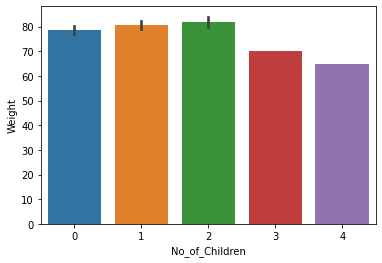

In [20]:
sns.barplot(x=absent['No_of_Children'],y=absent['Weight'])

## Wilcoxon Rank Sum test

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:140%">
                <font color="#21618C">
                    <b>A consulting company wants to check if there is any difference in medians of absenteeism hours for social drinkers and non-drinkers.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [237]:
abstime_nondrinker = absent[absent['Social_drinker'] == 0]['Absenteeism_time_hours']
abstime_drinker = absent[absent['Social_drinker'] == 1]['Absenteeism_time_hours']

test_stat, p_value = stats.ranksums(abstime_drinker, abstime_nondrinker)
print("Test statistic:", test_stat)
print("p-value:", p_value)

Test statistic: 2.7468466490425287
p-value: 0.0060171261459397545


* p-value is less than alpha (0.05)
* Therefore, we reject the null hypothesis and conclude there is difference in medians of absenteeism hours among social drinkers and non-drinkers 

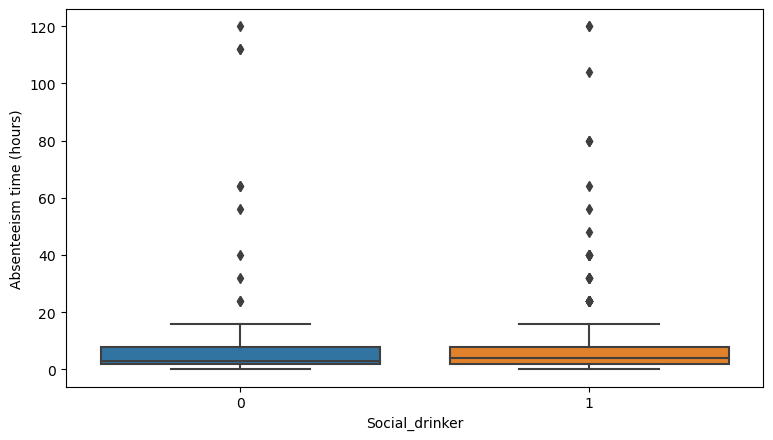

In [17]:
plt.figure(figsize=(9,5), dpi=100)
sns.boxplot(x = absent['Social_drinker'], y = absent['Absenteeism_time_hours'], orient = "v")
plt.ylabel('Absenteeism time (hours)')
plt.show()

## Chi-square goodness of fit

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The HR department claims that the 50% employees have completed high school (Education = 1), 25% employees are graduates (Education = 2), 20% employees are postgraduates (Education = 3) and 5% employees are doctorates (Education = 4).</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
# H0 : The observed number of employees from different education backgrounds is same as the claims made by HR
# Ha : The observed number of employees from different education backgrounds is different from the claims made by HR

absent.groupby('ID')['Education'].unique().apply(lambda x: sum(x)).value_counts()

1    28
2     4
3     3
4     1
Name: Education, dtype: int64

In [102]:
#### n = absent['ID'].nunique()
print("Number of employees:", n)

observed_values = np.array(absent.groupby('ID')['Education'].unique().apply(lambda x: sum(x)).value_counts())
print("Observed values:", observed_values)

expected_values = np.array(([n*0.5, n*0.25, n*0.2, n*0.05]))
print("Expected values:", expected_values)

# use the 'chisquare()' to perform the goodness of fit test
test_stat, p_value = stats.chisquare(f_obs = observed_values, f_exp = expected_values)

print('\nTest statistic:', test_stat)
print('p-value:', p_value)

Number of employees: 36
Observed values: [28  4  3  1]
Expected values: [18.   9.   7.2  1.8]

Test statistic: 11.138888888888888
p-value: 0.010998075754006876


In [103]:
# calculate the χ2-value for 95% of confidence level
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 4-1), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 7.8147


* p-value is lesser than alpha (0.05)
* Test statistic is greater than Chi-critical and falls in rejection region of H0
* Therefore we reject the null hypothesis and conclude that the number of employees from different education backgrounds is different from the claims made by HR

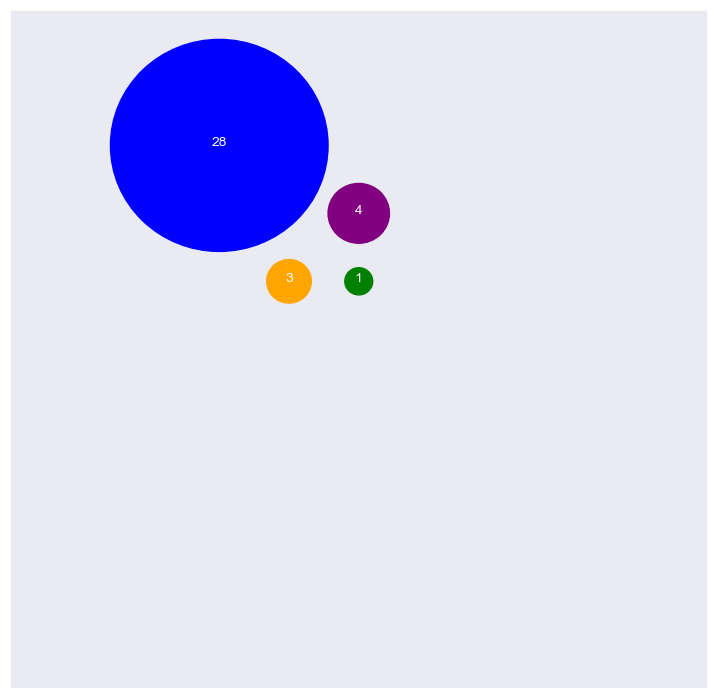

In [39]:
plt.figure(figsize=(9,9), dpi=100)
circle1 = plt.Circle(xy = (1.5,4), radius = 0.78, color = 'blue')
label = plt.text(x = 1.5, y = 4, s = "28", fontsize=10, ha="center", color = 'white')
circle2 = plt.Circle(xy = (2.5,3.5), radius = 0.22, color = 'purple')
label = plt.text(x = 2.5, y = 3.5, s = "4", fontsize=10, ha="center", color = 'white')
circle3 = plt.Circle(xy = (2,3), radius = 0.16, color = 'orange')
label = plt.text(x = 2, y = 3, s = "3", fontsize=10, ha="center", color = 'white')
circle4 = plt.Circle(xy = (2.5,3), radius = 0.1, color = 'green')
label = plt.text(x = 2.5, y = 3, s = "1", fontsize=10, ha="center", color = 'white')
ax = plt.gca()
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
plt.xticks([])
plt.yticks([])
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
plt.show()

## Chi-square test for independence

<table align="left">
    <tr>
        <td width="6%">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>A consulting company wants to check if there is any relationship between reason for absence and day of the week.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [104]:
# H0 : Reason for absence is independent of day of the week
# H1 : Reason for absence is dependent on day of the week

# use 'crosstab()' to create a table for each job role level and business travel count 
table = pd.crosstab(absent['Reason_for_absence'], absent['Day_of_the_week'])
print(table)

# observed values  
observed_values = table.values
observed_values

Day_of_the_week      2   3   4   5   6
Reason_for_absence                    
0                    5  13  11   7   6
1                    6   3   6   0   1
2                    0   0   1   0   0
3                    0   0   1   0   0
4                    0   0   0   2   0
5                    0   1   1   0   1
6                    2   2   2   1   1
7                    7   1   5   1   1
8                    1   2   1   1   1
9                    1   2   1   0   0
10                   9   1   6   4   5
11                  10   4   7   4   1
12                   2   2   2   1   1
13                  12  10  14  12   7
14                   3   4   1   7   4
15                   1   0   0   0   1
16                   0   2   0   0   1
17                   0   1   0   0   0
18                   5   8   4   2   2
19                  11   9   5   8   7
21                   1   1   2   2   0
22                   9   6   9   4  10
23                  22  37  33  30  27
24                   1   

array([[ 5, 13, 11,  7,  6],
       [ 6,  3,  6,  0,  1],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  0,  0,  2,  0],
       [ 0,  1,  1,  0,  1],
       [ 2,  2,  2,  1,  1],
       [ 7,  1,  5,  1,  1],
       [ 1,  2,  1,  1,  1],
       [ 1,  2,  1,  0,  0],
       [ 9,  1,  6,  4,  5],
       [10,  4,  7,  4,  1],
       [ 2,  2,  2,  1,  1],
       [12, 10, 14, 12,  7],
       [ 3,  4,  1,  7,  4],
       [ 1,  0,  0,  0,  1],
       [ 0,  2,  0,  0,  1],
       [ 0,  1,  0,  0,  0],
       [ 5,  8,  4,  2,  2],
       [11,  9,  5,  8,  7],
       [ 1,  1,  2,  2,  0],
       [ 9,  6,  9,  4, 10],
       [22, 37, 33, 30, 27],
       [ 1,  1,  1,  0,  0],
       [10,  5,  3,  8,  5],
       [10,  6,  7,  2,  8],
       [10,  7, 20, 12, 20],
       [22, 26, 13, 17, 34]], dtype=int64)

In [105]:
# calculate the χ2-value for 99% of confidence level
# use 'stats.chi2.isf()' to find the χ2-value corresponding to the upper tail probability 'q'

# df = (r - 1) * (c - 1)
# df = 27 * 4 = 108

chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 108), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 133.2569


In [106]:
# use the 'chi2_contingency()' to check the independence of variables

test_stat, p, dof, expected_value = stats.chi2_contingency(observed = observed_values, correction = False)

print("Test statistic:", round(test_stat, 7))
print("p-value:", round(p, 6))
print("Degrees of freedom:", dof)
print("\nExpected values:") 
print(expected_value)

Test statistic: 132.9140038
p-value: 0.05213
Degrees of freedom: 108

Expected values:
[[ 9.09336942  8.75236806  8.86603518  7.10419486  8.18403248]
 [ 3.46414073  3.33423545  3.37753721  2.70635995  3.11772666]
 [ 0.2165088   0.20838972  0.21109608  0.1691475   0.19485792]
 [ 0.2165088   0.20838972  0.21109608  0.1691475   0.19485792]
 [ 0.43301759  0.41677943  0.42219215  0.33829499  0.38971583]
 [ 0.64952639  0.62516915  0.63328823  0.50744249  0.58457375]
 [ 1.73207037  1.66711773  1.68876861  1.35317997  1.55886333]
 [ 3.24763194  3.12584574  3.16644114  2.53721245  2.92286874]
 [ 1.29905277  1.25033829  1.26657645  1.01488498  1.1691475 ]
 [ 0.86603518  0.83355886  0.8443843   0.67658999  0.77943166]
 [ 5.41271989  5.2097429   5.27740189  4.22868742  4.8714479 ]
 [ 5.62922869  5.41813261  5.48849797  4.39783491  5.06630582]
 [ 1.73207037  1.66711773  1.68876861  1.35317997  1.55886333]
 [11.90798376 11.46143437 11.61028417  9.30311231 10.71718539]
 [ 4.11366712  3.9594046   4.01

**p-value is just slightly greater than alpha (0.05)** 


**Test statistic is lesser than Chi-critical value and falls in acceptance region of H0**


**Therefore we fail to reject the null hypothesis and conclude that reason for absence is independent of day of the week**

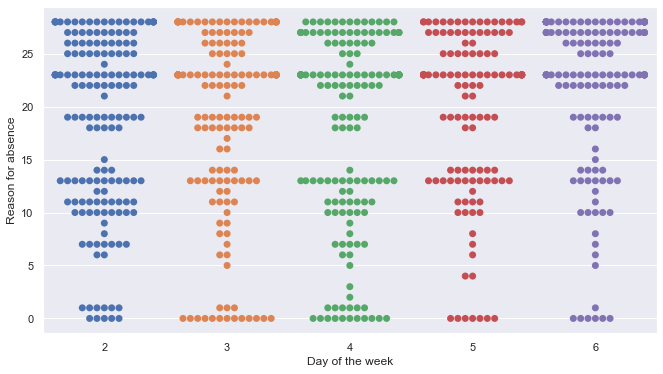

In [40]:
plt.figure(figsize = (11, 6))
x = absent['Day_of_the_week']
y = absent['Reason_for_absence']
sns.swarmplot(x, y, size = 7)
plt.ylabel('Reason for absence', fontsize = 12)
plt.xlabel('Day of the week', fontsize = 12)
plt.show()

## CLT Simulation of Absenteeism time 

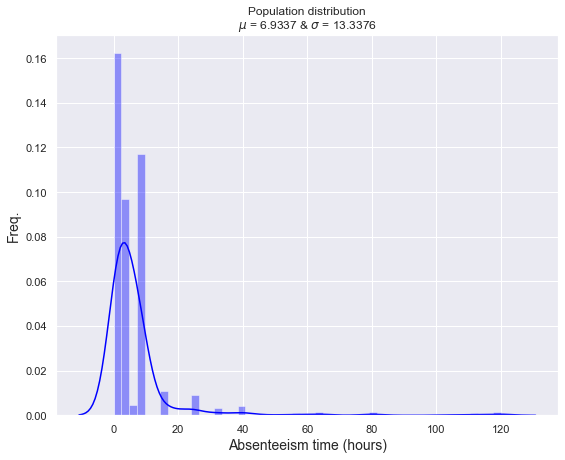

In [92]:
plt.figure(figsize = (9, 7))
sns.distplot(absent['Absenteeism_time_hours'], color = 'blue')
mu = absent['Absenteeism_time_hours'].mean()
sigma = absent['Absenteeism_time_hours'].std()
plt.title("Population distribution\n$\mu$ = %.4f & $\sigma$ = %.4f" % (mu, sigma))
plt.ylabel('Freq.', fontsize = 14)
plt.xlabel('Absenteeism time (hours)', fontsize = 14)
plt.show()

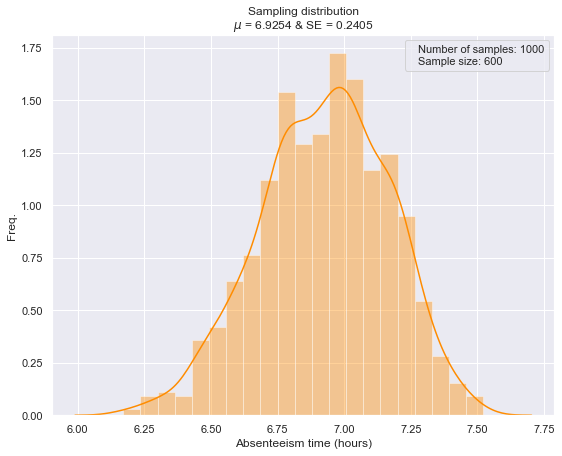

In [86]:
# Simulation of Absenteeism time (hours) for 1000 samples

number_of_sample = 1000
sample_size = 600

df1000 = pd.DataFrame()

for i in range(1, number_of_sample+1):
    normal_sample = random.sample(population = list(absent['Absenteeism_time_hours']), k = sample_size)
    col = f'Sample_{i}'
    df1000[col] = normal_sample
    
# Plotting the sampling distribution
df_absenteeism_sample_means = pd.DataFrame(df1000.mean(), columns = ['Sample_Means'])


plt.figure(figsize = (9, 7))
sns.distplot(df_absenteeism_sample_means, color = 'darkorange', hist = True)
xbar = df_absenteeism_sample_means['Sample_Means'].mean()
SE = df_absenteeism_sample_means['Sample_Means'].std()
plt.title("Sampling distribution\n$\mu$ = %.4f & SE = %.4f" % (xbar, SE))
plt.legend(['Number of samples: %d\nSample size: %d' % (number_of_sample, sample_size)], handlelength=0)
plt.ylabel('Freq.', fontsize = 12)
plt.xlabel('Absenteeism time (hours)', fontsize = 12)
plt.show()

In [87]:
df1000

,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,...,Sample_991,Sample_992,Sample_993,Sample_994,Sample_995,Sample_996,Sample_997,Sample_998,Sample_999,Sample_1000
0,0,2,3,1,2,3,8,1,8,8,...,1,8,2,2,3,8,2,2,2,8
1,1,4,4,2,3,2,24,4,2,8,...,8,8,3,2,8,24,0,2,8,3
2,8,8,2,2,8,3,0,40,8,2,...,4,1,0,4,4,8,1,0,24,1
3,8,1,3,8,3,8,8,8,8,0,...,1,4,3,1,4,2,0,1,2,3
4,2,1,8,8,5,2,1,8,1,80,...,32,3,4,8,8,1,1,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,3,8,8,0,3,4,0,4,4,8,...,32,3,3,8,8,8,8,2,1,3
596,5,1,24,120,2,0,8,0,3,8,...,3,8,24,24,2,0,8,2,8,3
597,4,64,1,2,2,2,1,4,2,3,...,2,2,8,8,4,1,0,8,1,2
598,2,8,3,16,8,8,0,8,2,3,...,3,8,8,8,2,8,4,2,3,24


In [88]:
df_absenteeism_sample_means

,Sample_Means
Sample_1,7.166667
Sample_2,6.396667
Sample_3,6.793333
Sample_4,6.873333
Sample_5,7.086667
...,...
Sample_996,7.093333
Sample_997,6.851667
Sample_998,7.023333
Sample_999,6.668333


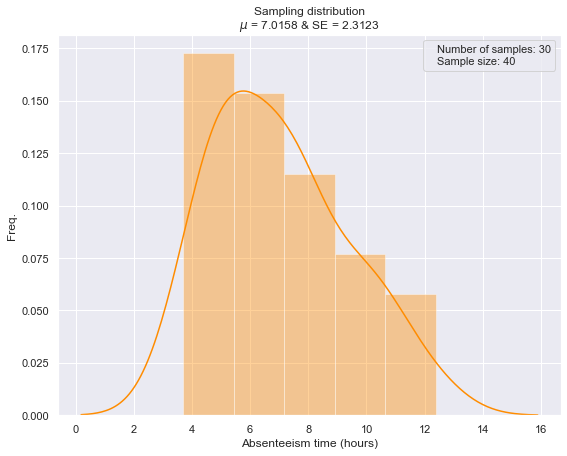

In [89]:
# Simulation of Absenteeism time (hours) for 30 samples

number_of_sample = 30
sample_size = 40

df30 = pd.DataFrame()

for i in range(1, number_of_sample+1):
    normal_sample = random.sample(population = list(absent['Absenteeism_time_hours']), k = sample_size)
    col = f'Sample_{i}'
    df30[col] = normal_sample
    
# Plotting the sampling distribution
df_absenteeism_sample_means = pd.DataFrame(df30.mean(), columns = ['Sample_Means'])


plt.figure(figsize = (9, 7))
sns.distplot(df_absenteeism_sample_means, color = 'darkorange', hist = True)
xbar = df_absenteeism_sample_means['Sample_Means'].mean()
SE = df_absenteeism_sample_means['Sample_Means'].std()
plt.title("Sampling distribution\n$\mu$ = %.4f & SE = %.4f" % (xbar, SE))
plt.legend(['Number of samples: %d\nSample size: %d' % (number_of_sample, sample_size)], handlelength=0)
plt.ylabel('Freq.', fontsize = 12)
plt.xlabel('Absenteeism time (hours)', fontsize = 12)
plt.show()